# DANISH CPI DELVEOPMENT 2008M1 - 20024M2 BY KEY ELEMENTS

In this Data project we investigate the danish consumer price index and the subset conponents it is made up off, to get a better understanding of the inflation in the last 16 years
We yse data directly gahtered from the Statistics Denmark's StatBank defined as PRIS111. 
https://www.statistikbanken.dk/statbank5a/default.asp?w=1280  
Notice that the data is based on the indexed year of 2015. 

Imports and set magics:

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
file_path = "FPI_KEY_2008_FORWARD.xlsx" 
df = pd.read_excel(file_path)
df.head(5)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Unnamed: 0,00 Forbrugerprisindekset i alt,01 Fødevarer og ikke-alkoholiske drikkevarer,02. Alkoholiske drikkevarer og tobak,03. Beklædning og fodtøj,"04. Boligbenyttelse, elektricitet og opvarmning","05. Møbler, husholdningsudstyr og husholdningstjenester",06. Sundhed,07. Transport,08. Kommunikation,09. Fritid og kultur,10. Uddannelse,11. Restauranter og hoteller,12. Andre varer og tjenester,13.1 Varer i alt,13.2 Tjenester i alt,14.1 Forbrugerprisindeks ekskl. energi og ikke-forarbejdede fødevarer (Kerneinflation),15.1 Forbrugerprisindeks ekskl. energi
0,2008M01,88.2,89.5,76.5,84.5,84.0,93.5,88.7,95.0,119.4,98.8,76.7,84.0,82.5,92.9,83.8,87.9,88.1
1,2008M02,89.3,89.7,76.5,93.5,85.3,94.0,88.2,95.1,117.9,100.5,76.7,84.6,82.7,93.7,85.0,89.2,89.2
2,2008M03,89.7,90.0,77.7,98.1,85.5,94.3,88.4,95.5,117.8,99.3,76.7,84.9,83.3,94.6,85.0,89.5,89.6
3,2008M04,90.0,90.9,78.3,98.8,85.6,94.6,89.5,95.9,117.3,99.0,76.7,85.3,83.6,95.1,85.1,89.6,89.8
4,2008M05,90.3,91.6,78.3,98.8,85.6,95.1,88.9,97.2,117.1,98.8,76.7,86.0,83.8,95.5,85.2,89.8,90.1


# Read and clean data

In [49]:
# Extract the first 4 characters from each string in the first column to get the year
df['Years'] = df[df.columns[0]].apply(lambda x: x[:4])

# Now 'df' has an additional column named 'Year' that contains the year portion extracted from the first column
df.head(5)

,Unnamed: 0,00 Forbrugerprisindekset i alt,01 Fødevarer og ikke-alkoholiske drikkevarer,02. Alkoholiske drikkevarer og tobak,03. Beklædning og fodtøj,"04. Boligbenyttelse, elektricitet og opvarmning","05. Møbler, husholdningsudstyr og husholdningstjenester",06. Sundhed,07. Transport,08. Kommunikation,09. Fritid og kultur,10. Uddannelse,11. Restauranter og hoteller,12. Andre varer og tjenester,13.1 Varer i alt,13.2 Tjenester i alt,14.1 Forbrugerprisindeks ekskl. energi og ikke-forarbejdede fødevarer (Kerneinflation),15.1 Forbrugerprisindeks ekskl. energi,Year,Years
0,2008M01,88.2,89.5,76.5,84.5,84.0,93.5,88.7,95.0,119.4,98.8,76.7,84.0,82.5,92.9,83.8,87.9,88.1,2008M01,2008
1,2008M02,89.3,89.7,76.5,93.5,85.3,94.0,88.2,95.1,117.9,100.5,76.7,84.6,82.7,93.7,85.0,89.2,89.2,2008M02,2008
2,2008M03,89.7,90.0,77.7,98.1,85.5,94.3,88.4,95.5,117.8,99.3,76.7,84.9,83.3,94.6,85.0,89.5,89.6,2008M03,2008
3,2008M04,90.0,90.9,78.3,98.8,85.6,94.6,89.5,95.9,117.3,99.0,76.7,85.3,83.6,95.1,85.1,89.6,89.8,2008M04,2008
4,2008M05,90.3,91.6,78.3,98.8,85.6,95.1,88.9,97.2,117.1,98.8,76.7,86.0,83.8,95.5,85.2,89.8,90.1,2008M05,2008


## Explore variables given in the data set

**Interactive plot** :

In [38]:
# Assuming 'df' is your DataFrame
column_names = df.columns.tolist()

# Print each column name on a new line
for column_name in column_names:
    print(column_name)

Unnamed: 0
00 Forbrugerprisindekset i alt
01 Fødevarer og ikke-alkoholiske drikkevarer
02. Alkoholiske drikkevarer og tobak
03. Beklædning og fodtøj
04. Boligbenyttelse, elektricitet og opvarmning
05. Møbler, husholdningsudstyr og husholdningstjenester
06. Sundhed
07. Transport
08. Kommunikation
09. Fritid og kultur
10. Uddannelse
11. Restauranter og hoteller
12. Andre varer og tjenester
13.1 Varer i alt
13.2 Tjenester i alt
14.1 Forbrugerprisindeks ekskl. energi og ikke-forarbejdede fødevarer (Kerneinflation)
15.1 Forbrugerprisindeks ekskl. energi
Years


Explain what you see when moving elements of the interactive plot around. 

# Plot of data

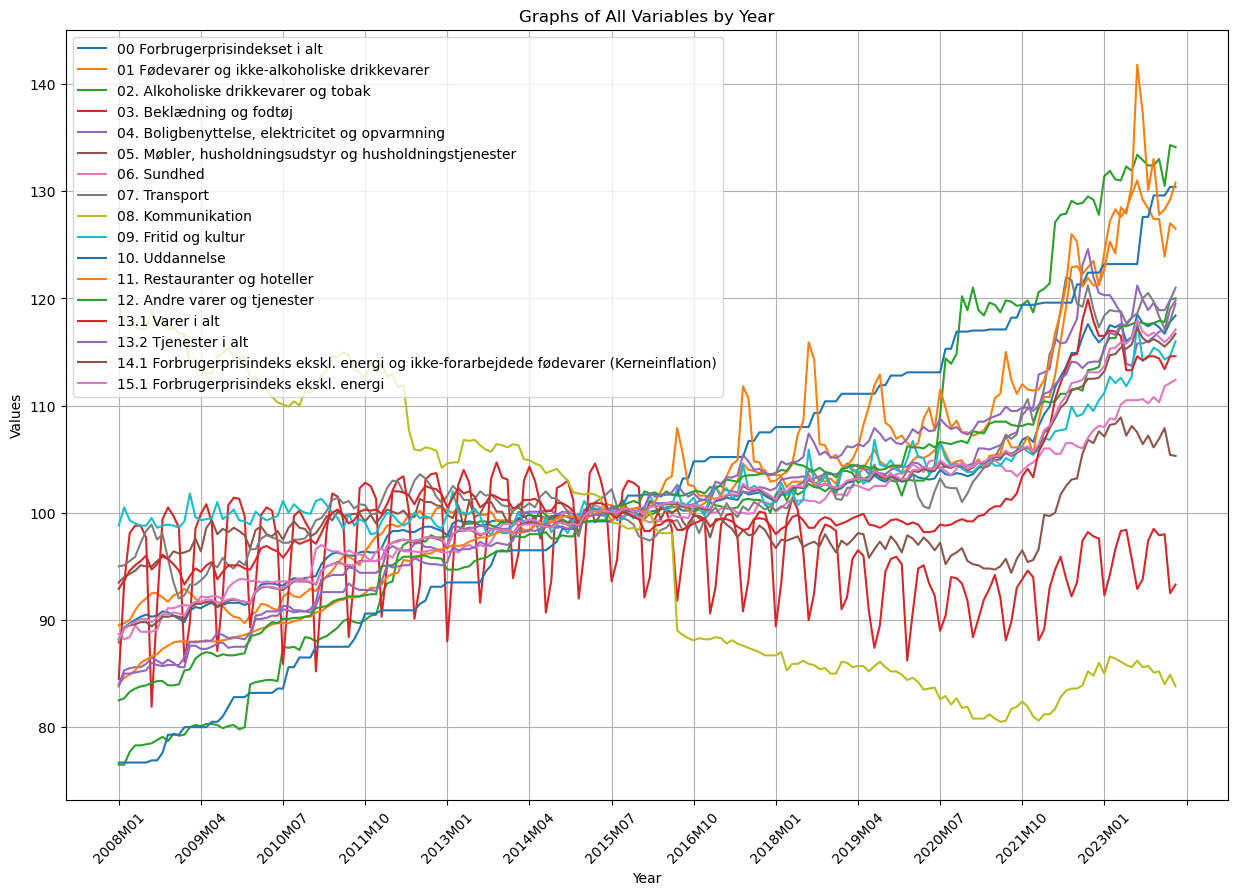

In [66]:
# Extract the year from the first column and create a new 'Year' column
df['Year'] = df[df.columns[0]].apply(lambda x: x[:12])

# Set the figure size for better readability
plt.figure(figsize=(15, 10))

# Plot each column against 'Year', skipping the first original column and the new 'Year' column itself
for column in df.columns[1:-2]:  # Skip the last column as it is the 'Year' column
    plt.plot(df['Year'], df[column], label=column)

# Add legend to the plot
plt.legend()

# Add titles and labels
plt.title('Graphs of All Variables by Year')
plt.xlabel('Year')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15)) #max 15 labels on the x-axis
plt.xticks(rotation=45) 
plt.ylabel('Values')
plt.grid(True)

# Show the plot
plt.show()


In [46]:
def plot_growth_rates(category):
    plt.figure(figsize=(12, 8))
    plt.plot(growth_rates.index, growth_rates[category], label=category)
    plt.title(f'Consumer Price Index Growth Rates by {category} (2009-2024)')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create a dropdown and link it to the plotting function
dropdown = widgets.Dropdown(options=growth_rates.columns, description='Category:')
widgets.interactive(plot_growth_rates, category=dropdown)


interactive(children=(Dropdown(description='Category:', options=('00 Forbrugerprisindekset i alt', '01 Fødevar…

# Analysis

In [ ]:
df.describe()

,00 Forbrugerprisindekset i alt,01 Fødevarer og ikke-alkoholiske drikkevarer,02. Alkoholiske drikkevarer og tobak,03. Beklædning og fodtøj,"04. Boligbenyttelse, elektricitet og opvarmning","05. Møbler, husholdningsudstyr og husholdningstjenester",06. Sundhed,07. Transport,08. Kommunikation,09. Fritid og kultur,10. Uddannelse,11. Restauranter og hoteller,12. Andre varer og tjenester,13.1 Varer i alt,13.2 Tjenester i alt,14.1 Forbrugerprisindeks ekskl. energi og ikke-forarbejdede fødevarer (Kerneinflation),15.1 Forbrugerprisindeks ekskl. energi
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,101.029897,102.425773,101.721134,96.350515,100.766495,99.118041,99.727835,102.782990,97.446392,102.468041,101.681959,102.638144,100.036082,100.995361,100.939691,100.561340,100.691237
std,7.165059,9.616688,14.989109,4.885765,8.933048,3.140300,5.338660,6.831129,12.892779,4.271597,14.424814,11.801602,9.052377,5.709026,9.098398,6.693497,6.796462
min,88.200000,89.500000,76.500000,81.900000,84.000000,93.500000,88.200000,92.000000,80.500000,98.000000,76.700000,84.000000,82.500000,92.900000,83.800000,87.900000,88.100000
25%,96.975000,98.100000,92.575000,92.900000,95.300000,97.200000,96.400000,99.225000,85.425000,99.500000,90.900000,93.475000,94.700000,98.525000,93.925000,95.975000,96.000000
50%,100.200000,100.400000,100.200000,96.950000,100.550000,98.800000,99.900000,101.150000,98.500000,100.750000,101.700000,100.550000,101.550000,99.500000,100.900000,100.300000,100.400000
75%,103.200000,104.575000,103.675000,100.100000,104.200000,100.000000,103.675000,103.275000,110.375000,104.400000,113.100000,108.350000,106.075000,101.200000,107.400000,103.775000,103.975000
max,118.500000,131.000000,134.300000,104.700000,124.600000,108.900000,112.400000,122.000000,119.400000,117.800000,130.400000,141.800000,120.000000,119.900000,121.200000,117.300000,118.000000


We now look at the percentage growth in the CPI and it's subsets and calculating the average growth rate, to get an understanding of how the individual components have done on average over the years. 

In [62]:

# Select the columns 1 to 14
columns_1_to_18 = df.iloc[:, 1:18]

# Group the selected columns by the 'Years' variable and calculate the average for each year
average_by_year = columns_1_to_18.groupby(df['Years']).mean()

# Create a new DataFrame from the calculated averages
average_df = pd.DataFrame(average_by_year)

# Calculate the growth rate for each year
growth_rates = average_df.pct_change()

# Remove the first row (2008) since it doesn't have a previous year for comparison
growth_rates = growth_rates.dropna()

# Calculate the total growth rate
total_growth_rate = (1 + growth_rates).prod() - 1

# Calculate the number of years
num_years = len(df) - 1  # Number of years is the total number of years minus the first year

# Calculate the average growth rate
average_growth_rate = ((1 + total_growth_rate) ** (1 / num_years) - 1)*100
print("Average Growth Rate of CPI and components of the danish CPI for the period 2008M1 - 2024M2")
average_growth_rate.head(100)

Average Growth Rate of CPI and components of the danish CPI for the period 2008M1 - 2024M2


00 Forbrugerprisindekset i alt                                                            0.140552
01 Fødevarer og ikke-alkoholiske drikkevarer                                              0.169322
02. Alkoholiske drikkevarer og tobak                                                      0.279663
03. Beklædning og fodtøj                                                                 -0.012852
04. Boligbenyttelse, elektricitet og opvarmning                                           0.171975
05. Møbler, husholdningsudstyr og husholdningstjenester                                   0.053050
06. Sundhed                                                                               0.117180
07. Transport                                                                             0.109765
08. Kommunikation                                                                        -0.172475
09. Fritid og kultur                                                                      0.078829
10. Uddann

As we can see above, there has been on average in the CPI an growth of 2% per year, while some components such as clothes and footwear, and Communication has had an average growth rate over the years.
As these are just yearly averages, and as we know the prices has flucturated more since the pandemic and war in Ukraine, we will now plot the yearly growth rates of all the subsets to see if it is these recent years, which is the driving force behind the average CPI growth.

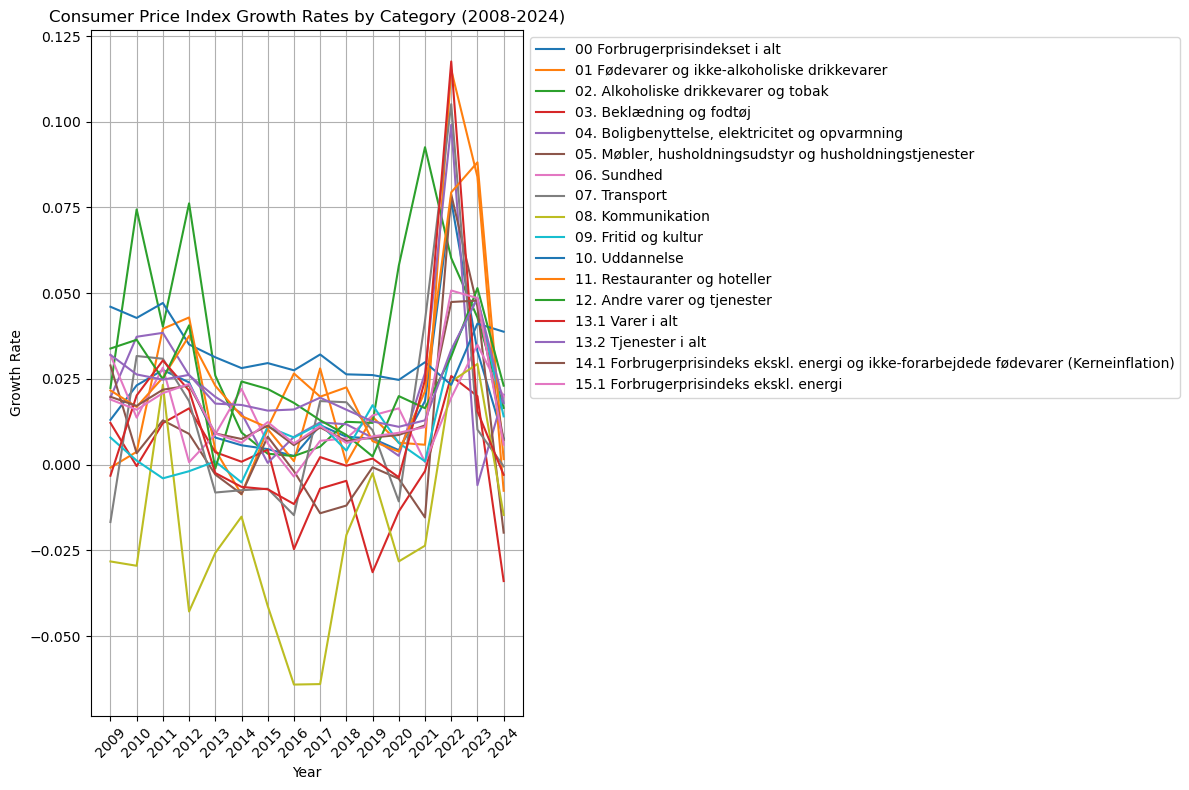

In [63]:
# Plot the growth rates
plt.figure(figsize=(12, 8))

# Plot each column (category) separately
for column in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[column], label=column)

plt.title('Consumer Price Index Growth Rates by Category (2008-2024)')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

As we can see from the graph abovefrom 2021 and 2022, there wre large spikes in growth of all varaibles, even communication, clothing and transport, which were negative for most of our timeframe. We can therfore see how the growth in prices has indeed been caused in more recent years, and that the average growth rate would have been much lower, had it not been for 2021 and 2022.